<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.2

## Statistical Proof

### Part 1: Student's t-Test

The *t*-test is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means

Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in [this](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) dataset these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [5]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [6]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv("housing.data", header=None, names=names, delim_whitespace=True)

In [7]:
# Head
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
# Shape
data.shape

(506, 14)

##### 1. Plot Histogram of `RM`

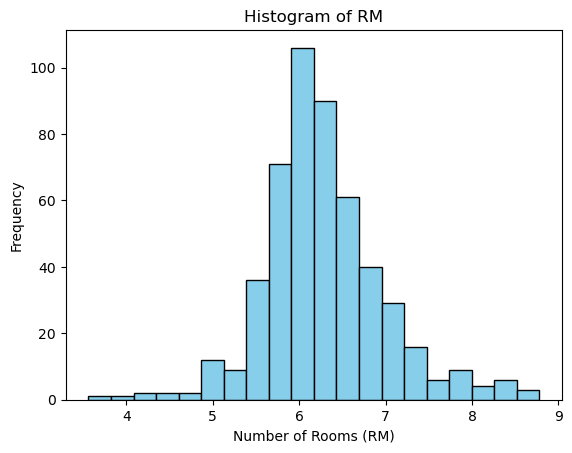

In [10]:
#  ANSWER
#  'data set and 'RM'  column  to plot
data['RM'].plot(kind='hist', bins=20, edgecolor='black', color='skyblue')

# Set labels and title
plt.xlabel('Number of Rooms (RM)')
plt.ylabel('Frequency')
plt.title('Histogram of RM')

# Show the histogram
plt.show()


##### 2. Plot Histogram of `MEDV`

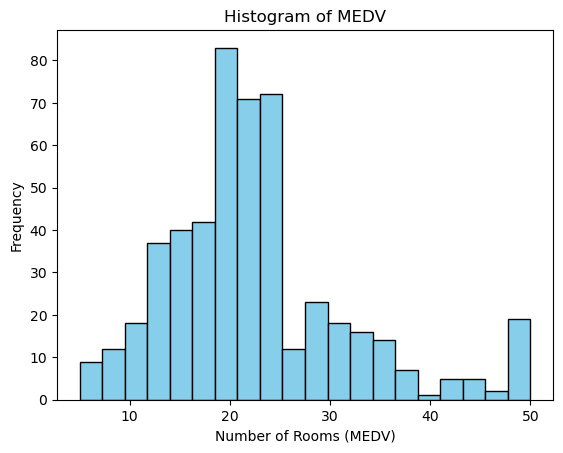

In [11]:
# A
data['MEDV'].plot(kind='hist', bins=20, edgecolor='black', color='skyblue')

# Set labels and title
plt.xlabel('Number of Rooms (MEDV)')
plt.ylabel('Frequency')
plt.title('Histogram of MEDV')

# Show the histogram
plt.show()NSWER


##### 3.A Draw Scatter Plot of `RM` & `MEDV`

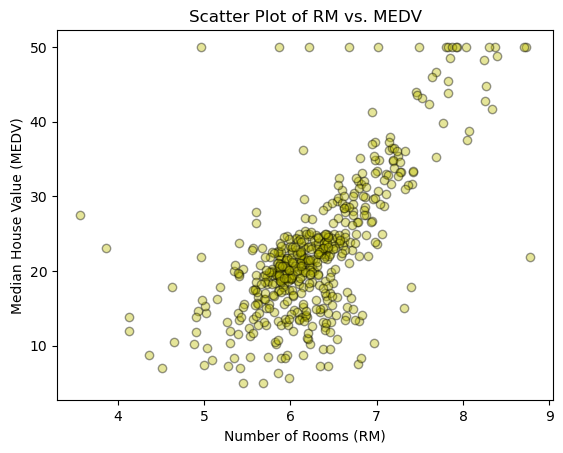

In [19]:
# ANSWER

# 'data' set is my DataFrame and scatter plot 'RM' against 'medv'
plt.scatter(data['RM'], data['MEDV'], alpha=0.4, c='y',edgecolor='black', marker='o')

# Set labels and title
plt.xlabel('Number of Rooms (RM)')
plt.ylabel('Median House Value (MEDV)')
plt.title('Scatter Plot of RM vs. MEDV')

# Show the scatter plot
plt.show()

##### 3.B Is there any trend? State your observation.

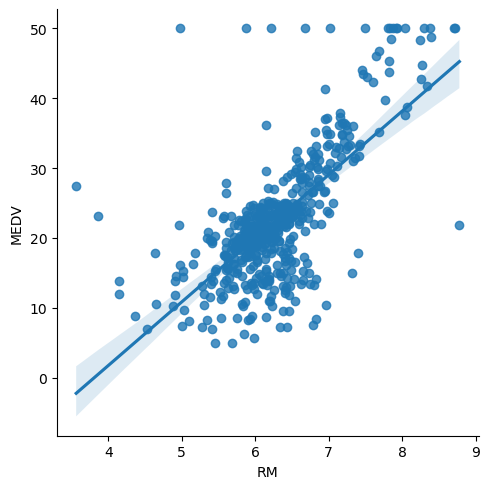

In [23]:
sns.lmplot(x='RM',y='MEDV',data=data)

In [25]:
#Per plot, there is a positive relations ship between bedrooms medv vs bedrooms rm

**ANSWER:**: ...

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

##### 4. Define Hypothesis

Let's assume if `RM` of house is more than 6, they are large house. Other houses are small. Price of houses increases when the `RM` increases.

**ANSWER:**

    H0: There is no difference between distribution of `Large House` & `Small House`
    H1: There is difference between distribution of `Large House` & `Small House`
    
**[Note]** _If you want you can explore the dataset and define different hypothesis._

##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [26]:
# ANSWER

alpha = 0.5

##### 6. Set Data

Now, let's create two sets of data
- Large House: Houses which have more than 6 rooms.
- Small House: Houses which have less than 6 rooms.

Take sample of 100 houses in each dataset.

In [27]:
# ANSWER
#HOW DO WE SUBSET ROOM OVER 6
N = 100
MEDV_OVER_6 = data[data['RM'] > 6]['MEDV'].sample(N)
MEDV_UNDER_6 = data[data['RM'] > 6]['MEDV'].sample(N)
MEDV_UNDER_6

63     25.0
453    17.8
64     33.0
109    19.4
505    11.9
       ... 
155    15.6
65     23.5
227    31.6
324    25.0
395    13.1
Name: MEDV, Length: 100, dtype: float64

##### 6.A [BONUS] Build histogram for both `Large House` & `Small House`

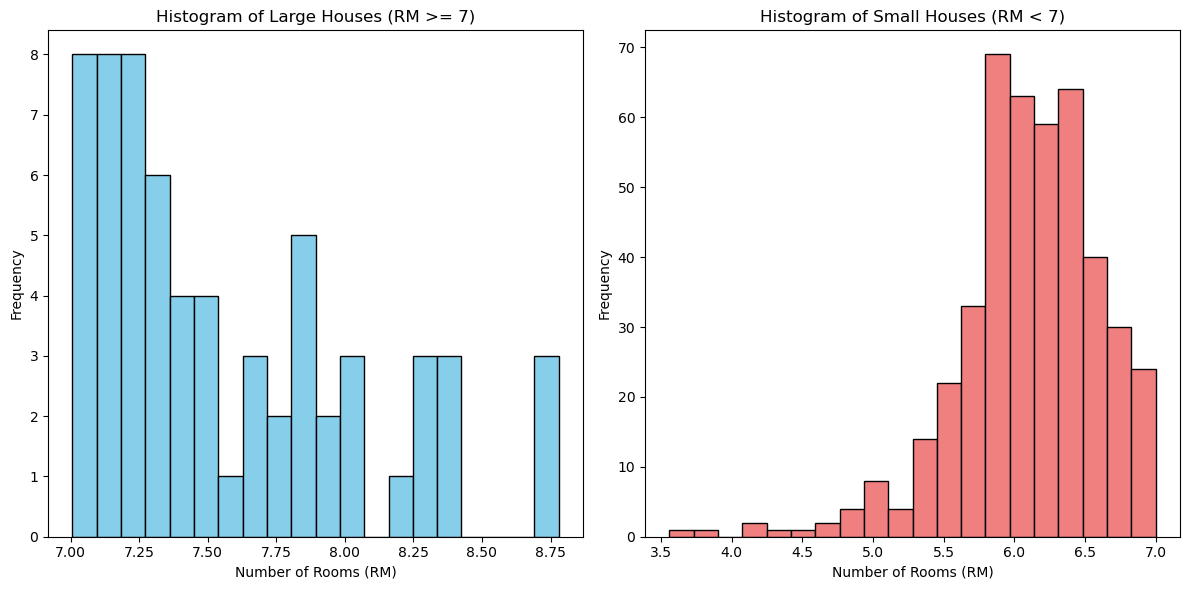

In [31]:
# ANSWER
#Define the threshold for categorizing large and small houses
threshold = 7  # You can adjust this threshold as needed

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for large houses (RM >= threshold)
large_houses = data[data['RM'] >= threshold]
axes[0].hist(large_houses['RM'], bins=20, edgecolor='black', color='skyblue')
axes[0].set_xlabel('Number of Rooms (RM)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Large Houses (RM >= {})'.format(threshold))

# Histogram for small houses (RM < threshold)
small_houses = data[data['RM'] < threshold]
axes[1].hist(small_houses['RM'], bins=20, edgecolor='black', color='lightcoral')
axes[1].set_xlabel('Number of Rooms (RM)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Small Houses (RM < {})'.format(threshold))

# Adjust subplot layout
plt.tight_layout()

# Show the histograms
plt.show()

##### 7. Calculate Variance

Calculate variance for both samples.

In [40]:
# ANSWER

var_MEDV_OVER_6 = MEDV_OVER_6.var()
var_MEDV_UNDER_6 = MEDV_UNDER_6.var()

print(var_MEDV_OVER_6)
print(var_MEDV_UNDER_6)

111.20977272727266
103.07050505050503


##### 8. Calculate Standard Deviation


Because we are dealing with two samples we need to compute the joint standard deviation.

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f63e99c30c01445668ea2cce9832da0f6810cb4b)

In [42]:
# ANSWER

std = np.sqrt((var_MEDV_OVER_6 + var_MEDV_UNDER_6)/2)

##### 9. Calculate test statistic

The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/070d365e1b347ea5f83f0147043868fa120b6646)


In [47]:
# ANSWER
t = (MEDV_OVER_6.mean() - MEDV_UNDER_6.mean()) / (std * np.sqrt(2/N))

print(t)

1.2398967711010191


##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [48]:
# ANSWER

df = 2 * N - 2 
df 

198

##### 11. Find the p-value

Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t)

In [51]:
# ANSWER
p = 1 - stats.t.cdf(abs(t),df=df)
p*2

0.21648101988552604

#### Interpret results

##### 12. Write a Function to Test Significance of `p_value`

Write a function which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message.

In [57]:
# ANSWER need an if condtion , guess the significance
#do it times 2
#There are a couple of issues with your code. Here's a fixed version:

def print_significance(p, alpha): 
    if p < alpha:
        result = "Reject null hypothesis"
    else:
        result = "Fail to reject null hypothesis"
        
    return result

p = 0.03  # Replace with your p-value
alpha = 0.05  # Replace with your alpha level
result = print_significance(p, alpha)
print(result)

Reject null hypothesis


In [ ]:
# ANSWER

In [ ]:
# ANSWER

##### 13. [Bonus] Write a function to calculate t, p_value from two samples.

Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

In [ ]:
# ANSWER

#### Use `Stats` Package

##### 14. Calculate the T-test for the means of *two independent* samples of scores

using following method of stats calculate the T-test for the means of two independent samples of scores.

> ttest_ind

In [ ]:
# ANSWER



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



